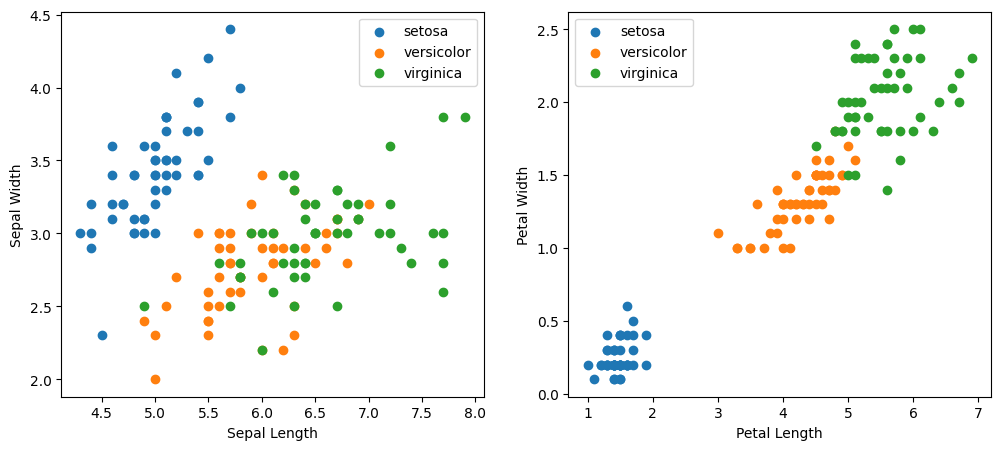

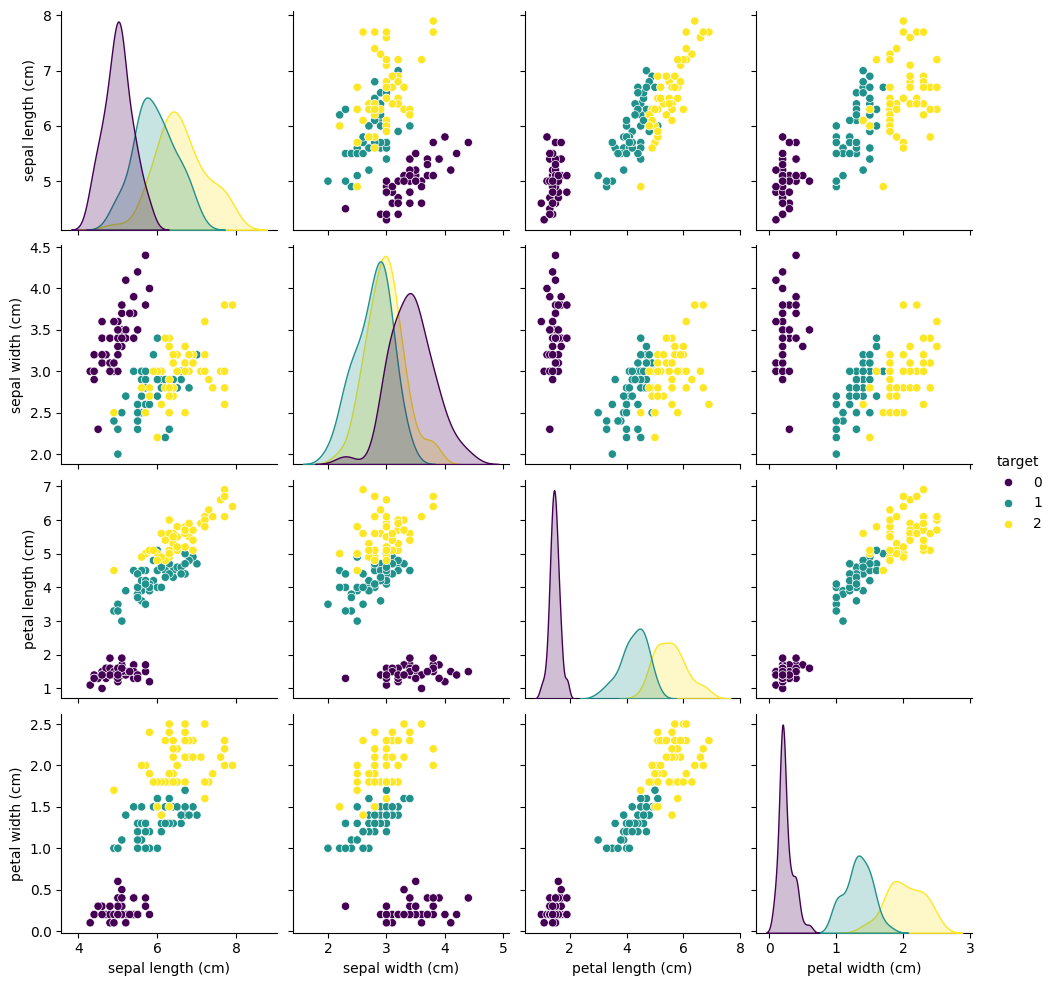


Результаты для Iris:
Setosa vs Versicolor accuracy: 1.0000
Versicolor vs Virginica accuracy: 0.9000


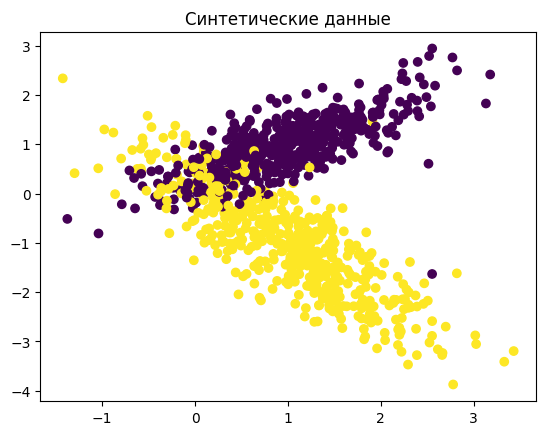


Синтетические данные accuracy: 0.9250


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Визуализация данных
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                label=iris.target_names[target])
plt.xlabel('Sepal Length'), plt.ylabel('Sepal Width'), plt.legend()

plt.subplot(1, 2, 2)
for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                label=iris.target_names[target])
plt.xlabel('Petal Length'), plt.ylabel('Petal Width'), plt.legend()
plt.show()

# Pairplot
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

# Подготовка датасетов
# setosa (0) vs versicolor (1)
df1 = df[df['target'].isin([0, 1])]

# versicolor (1) vs virginica (2)
df2 = df[df['target'] == 2].copy()
df2 = pd.concat([df[df['target'] == 1], df2])
df2['target'] = df2['target'].replace({1: 0, 2: 1})

# 4-8. Обработка и обучение для обоих датасетов
def process_dataset(dataset, name):
    X = dataset.drop('target', axis=1)
    y = dataset['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print(f'{name} accuracy: {accuracy:.4f}')
    return accuracy

print("\nРезультаты для Iris:")
acc1 = process_dataset(df1, "Setosa vs Versicolor")
acc2 = process_dataset(df2, "Versicolor vs Virginica")

# 9.
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=1, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Синтетические данные')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
syn_acc = model.score(X_test, y_test)
print(f"\nСинтетические данные accuracy: {syn_acc:.4f}")